## Gender Bias In Hiring

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
df = pd.read_csv("GenderBias.csv")
df.head()

EmployeeID  Gender  Age Education_Level  Experience_Years  \
0       E001    Male   42        Master's                19   
1       E002  Female   53      Bachelor's                32   
2       E003    Male   44        Master's                20   
3       E004    Male   54      Bachelor's                32   
4       E005    Male   24        Master's                 4   

   Performance_Score Department Hired  
0               4.33  Marketing   Yes  
1               4.63      Sales   Yes  
2               4.18  Marketing   Yes  
3               4.52  Marketing   Yes  
4               4.42       Tech   Yes

Data Pre-processing

In [3]:
#finding null values
df.isnull().sum()

EmployeeID           0
Gender               0
Age                  0
Education_Level      0
Experience_Years     0
Performance_Score    0
Department           0
Hired                0
dtype: int64

In [4]:
df.dtypes

EmployeeID            object
Gender                object
Age                    int64
Education_Level       object
Experience_Years       int64
Performance_Score    float64
Department            object
Hired                 object
dtype: object

In [5]:
df.nunique()

EmployeeID           500
Gender                 2
Age                   39
Education_Level        3
Experience_Years      41
Performance_Score    225
Department             4
Hired                  2
dtype: int64

In [6]:
df[['Age', 'Experience_Years', 'Performance_Score']].describe()

Age  Experience_Years  Performance_Score
count  500.000000        500.000000         500.000000
mean    41.428000         19.440000           3.711720
std     11.230006         11.323199           0.714421
min     22.000000          0.000000           2.500000
25%     32.000000         10.000000           3.070000
50%     42.000000         20.000000           3.700000
75%     51.000000         29.000000           4.340000
max     60.000000         40.000000           4.990000

<Axes: xlabel='Hired', ylabel='Performance_Score'>

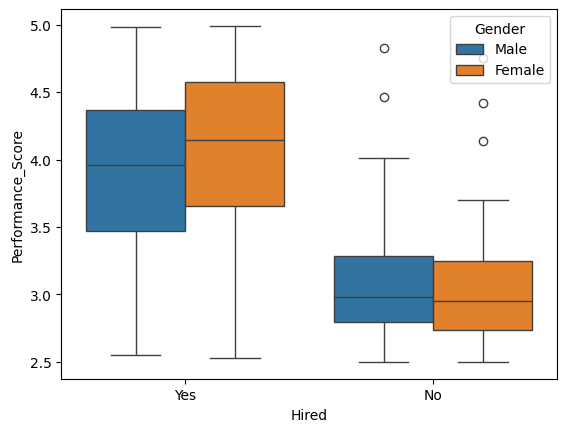

In [7]:
#box plot between Hired and Performance_score
sns.boxplot(data=df, x='Hired', y='Performance_Score', hue='Gender')

In [8]:
df.groupby(['Gender', 'Education_Level'])['Hired'].value_counts(normalize=True)

Gender  Education_Level  Hired
Female  Bachelor's       Yes      0.747748
                         No       0.252252
        Master's         Yes      0.649123
                         No       0.350877
        PhD              Yes      0.806452
                         No       0.193548
Male    Bachelor's       Yes      0.703390
                         No       0.296610
        Master's         Yes      0.740385
                         No       0.259615
        PhD              Yes      0.590909
                         No       0.409091
Name: proportion, dtype: float64

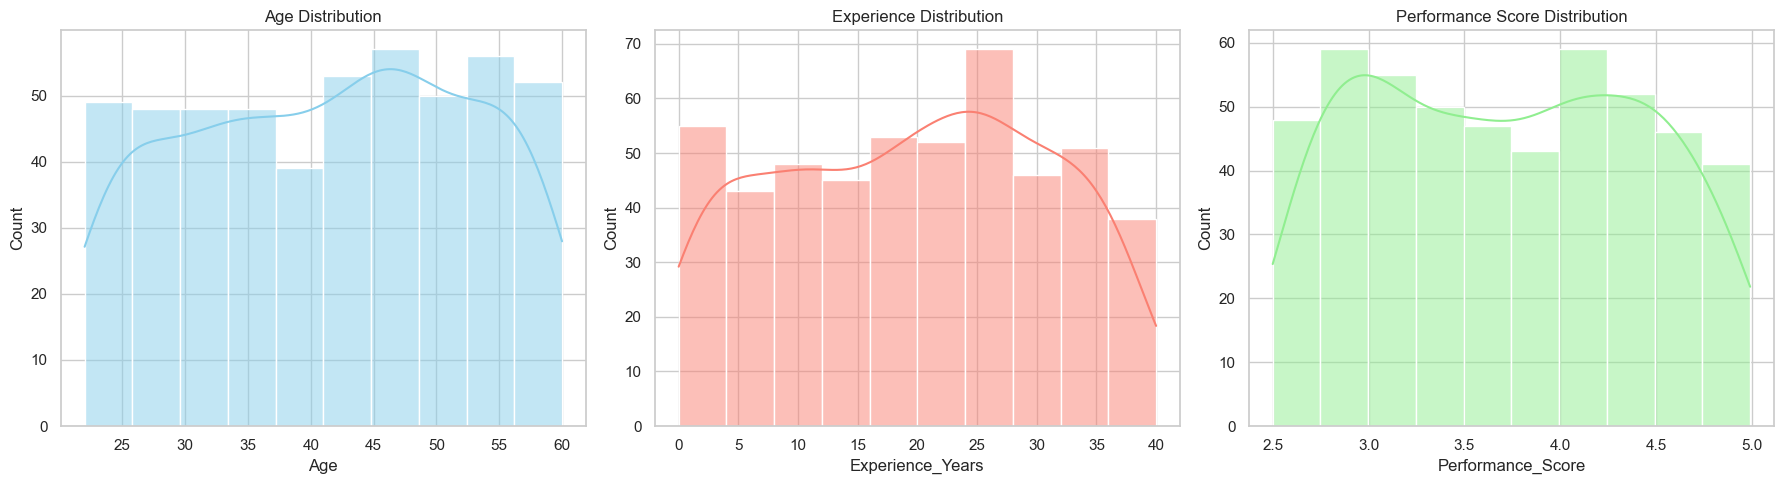

In [9]:
#histograms
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')

sns.histplot(df['Experience_Years'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Experience Distribution')

sns.histplot(df['Performance_Score'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Performance Score Distribution')

plt.tight_layout()
plt.show()

Hired          No        Yes
Gender                      
Female  28.906250  71.093750
Male    29.098361  70.901639


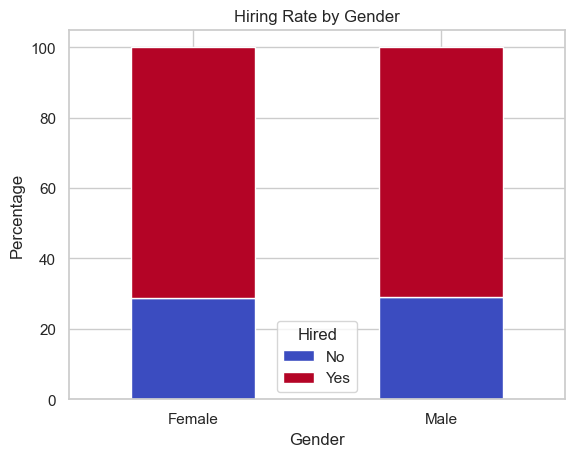

In [10]:
#comparision of hiring rate
hiring_by_gender = pd.crosstab(df['Gender'], df['Hired'], normalize='index') * 100
print(hiring_by_gender)

hiring_by_gender.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Hiring Rate by Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Hired')
plt.show()

In [11]:
#model training of both logistic regression and Random forest Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [12]:
df_model = df.copy()
le = LabelEncoder()
df_model['Gender'] = le.fit_transform(df_model['Gender'])
df_model['Education_Level'] = le.fit_transform(df_model['Education_Level'])
df_model['Department'] = le.fit_transform(df_model['Department'])
df_model['Hired'] = df_model['Hired'].map({'Yes': 1, 'No': 0})

In [13]:
X = df_model[['Gender', 'Age', 'Experience_Years', 'Education_Level', 'Department', 'Performance_Score']]
y = df_model['Hired']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.59      0.67        29
           1       0.85      0.93      0.89        71

    accuracy                           0.83       100
   macro avg       0.81      0.76      0.78       100
weighted avg       0.82      0.83      0.82       100

0.83


In [17]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = rfc.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67        29
           1       0.87      0.85      0.86        71

    accuracy                           0.80       100
   macro avg       0.76      0.77      0.76       100
weighted avg       0.80      0.80      0.80       100

0.8


In [20]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coefficients.sort_values(by='Coefficient', ascending=False)

Feature  Coefficient
5  Performance_Score     2.548542
0             Gender     0.200327
1                Age     0.024140
2   Experience_Years     0.000004
3    Education_Level    -0.044046
4         Department    -0.048301